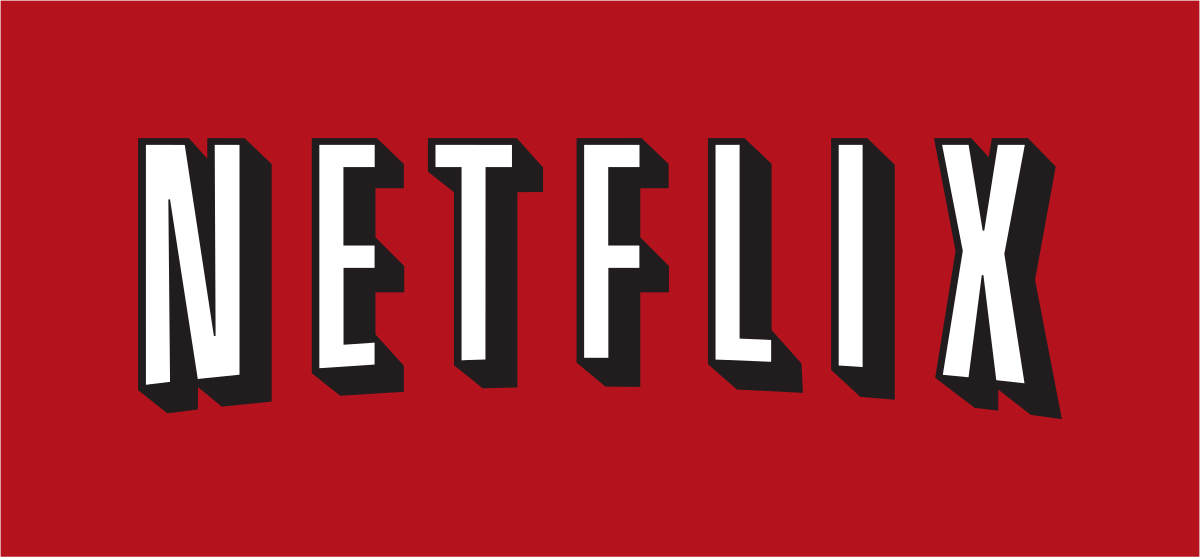

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing Dataset

In [2]:
df = pd.read_csv('netflix.csv')

In [3]:
#Creating a nested copy
df_nested = df.copy()

#Basic Analysis

In [4]:
df_nested.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df_nested.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
df_nested.shape

(8807, 12)

In [7]:
df_nested['listed_in'] = df_nested['listed_in'].str.split(',')

In [8]:
df_nested = df_nested.explode('listed_in').reset_index(drop=True)

In [9]:
df_nested

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...
...,...,...,...,...,...,...,...,...,...,...,...,...
19318,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,Children & Family Movies,"Dragged from civilian life, a former superhero..."
19319,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,Comedies,"Dragged from civilian life, a former superhero..."
19320,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
19321,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [10]:
df_nested.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19323 entries, 0 to 19322
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       19323 non-null  object
 1   type          19323 non-null  object
 2   title         19323 non-null  object
 3   director      13439 non-null  object
 4   cast          17819 non-null  object
 5   country       17601 non-null  object
 6   date_added    19303 non-null  object
 7   release_year  19323 non-null  int64 
 8   rating        19317 non-null  object
 9   duration      19320 non-null  object
 10  listed_in     19323 non-null  object
 11  description   19323 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.8+ MB


#Handling Null Values

In [11]:
(df_nested.isna().sum() / len(df_nested)) * 100

show_id          0.000000
type             0.000000
title            0.000000
director        30.450758
cast             7.783470
country          8.911660
date_added       0.103504
release_year     0.000000
rating           0.031051
duration         0.015526
listed_in        0.000000
description      0.000000
dtype: float64

In [12]:
df_nested['director'] = df_nested['director'].fillna('Unknown Director')

In [13]:
df_nested.isna().sum()

show_id            0
type               0
title              0
director           0
cast            1504
country         1722
date_added        20
release_year       0
rating             6
duration           3
listed_in          0
description        0
dtype: int64

In [14]:
df_nested['country'] = df_nested['country'].fillna('Unknown Country')

In [15]:
df_nested.date_added.dropna(inplace=True)

In [16]:
# Dropping rows where Data added is null
df_nested.dropna(subset=['date_added'],inplace=True)

In [17]:
df_nested.dropna(subset=['rating'],inplace=True)

In [18]:
df_nested['cast'] = df_nested['cast'].fillna('Unknown Cast')

In [19]:
df_nested.dropna(subset=['duration'],inplace=True)

In [20]:
df_nested['cast'] = df_nested['cast'].str.split(',')

In [21]:
df_nested = df_nested.explode('cast').reset_index(drop=True)

In [22]:
df_nested.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Unknown Director,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Unknown Director,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [23]:
df_nested.shape

(149284, 12)

In [24]:
df_nested['type'].value_counts()

Movie      101680
TV Show     47604
Name: type, dtype: int64

In [25]:
df_nested.drop('show_id',axis=1)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
3,TV Show,Blood & Water,Unknown Director,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
4,TV Show,Blood & Water,Unknown Director,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...
149279,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
149280,Movie,Zubaan,Mozez Singh,Meghna Malik,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
149281,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
149282,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...


In [26]:
df_nested.groupby('title')['type'].count()

title
#Alive                            6
#AnneFrank - Parallel Stories     4
#FriendButMarried                24
#FriendButMarried 2              24
#Roxy                            16
                                 ..
忍者ハットリくん                          2
海的儿子                             10
마녀사냥                             15
반드시 잡는다                           3
최강전사 미니특공대 : 영웅의 탄생               6
Name: type, Length: 8790, dtype: int64

In [27]:
df['director'] = df['director'].fillna('Unknown Director')

In [28]:
df['country'] = df['country'].fillna('Unknown Country')

In [29]:
df['rating'] = df['rating'].fillna('Unknown Rating')

In [30]:
df['duration'] = df['duration'].fillna('Unknown Duration')

In [31]:
df.dropna(subset='date_added',inplace=True)

In [32]:
df.drop('cast',axis=1,inplace=True)

In [33]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

#Data Exploration / EDA

In [34]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,Unknown Country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown Director,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [35]:
#Data Exploration using non graphical analysis
df['type'].value_counts()

Movie      6131
TV Show    2666
Name: type, dtype: int64

In [36]:
df['country'].value_counts()

United States                             2812
India                                      972
Unknown Country                            830
United Kingdom                             418
Japan                                      244
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 749, dtype: int64

In [37]:
df['rating'].value_counts()

TV-MA             3205
TV-14             2157
TV-PG              861
R                  799
PG-13              490
TV-Y7              333
TV-Y               306
PG                 287
TV-G               220
NR                  79
G                   41
TV-Y7-FV             6
Unknown Rating       4
NC-17                3
UR                   3
74 min               1
84 min               1
66 min               1
Name: rating, dtype: int64

In [38]:
df['release_year'].value_counts()

2018    1146
2017    1032
2019    1030
2020     953
2016     901
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [39]:
df[df['director'] != 'Unknown Director']['director'].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

In [40]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [41]:
df_cleaned = df[df['country'] != 'Unknown Country']

In [42]:
top_10_countries = df_cleaned['country'].value_counts()[:10].index

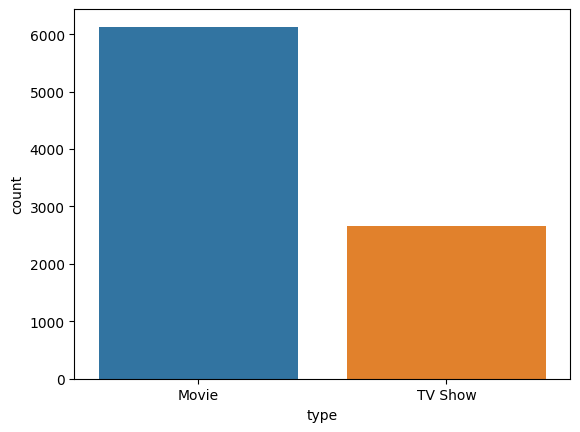

In [43]:
#Count of total movies and Tv shows
sns.countplot(data=df, x='type')
plt.show()

In [44]:
df_cleaned = df[df['country']!= 'Unknown Country']

In [45]:
top_10_countries = df_cleaned['country'].value_counts().iloc[:10]

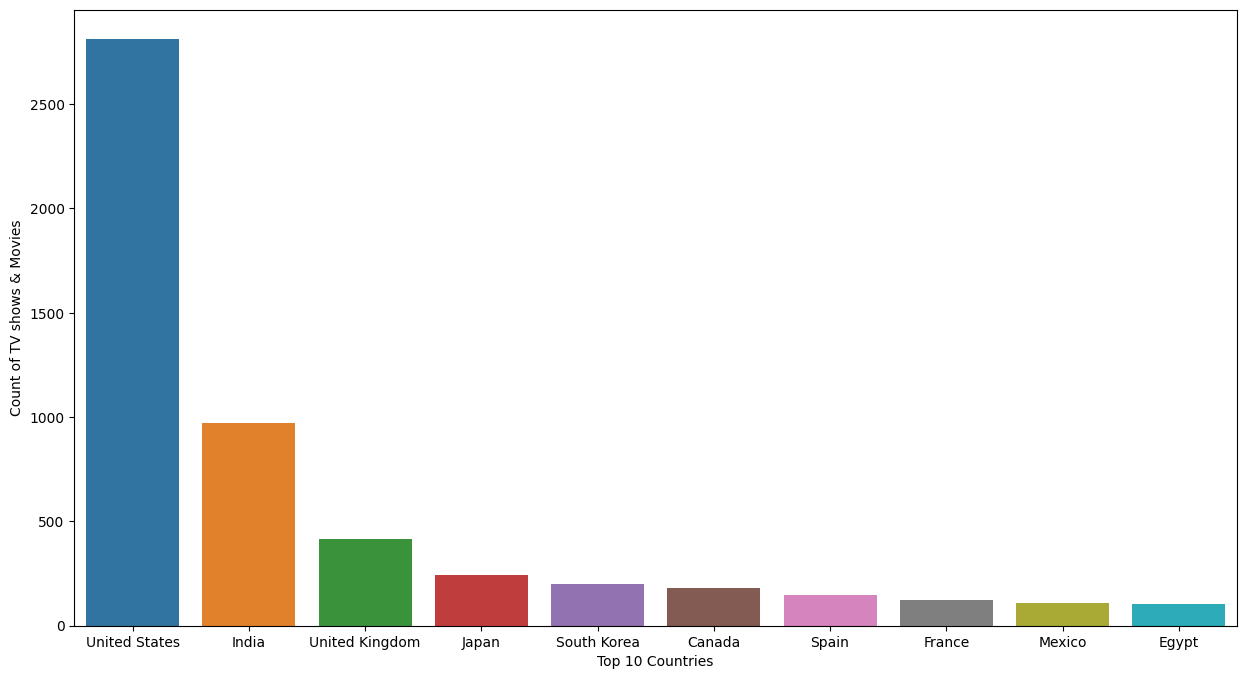

In [46]:
plt.figure(figsize=(15,8))
sns.countplot(data = df[df['country'].isin(top_10_countries.index)], x='country',order=top_10_countries.index)
plt.xlabel('Top 10 Countries')
plt.ylabel('Count of TV shows & Movies')
plt.show()

**Insight:**

* United states, India and UK are the top 3 countries where most of the movies and TV shows are produced.

In [47]:
top_10_ratings = df['rating'].value_counts().iloc[:10]
top_10_ratings

TV-MA    3205
TV-14    2157
TV-PG     861
R         799
PG-13     490
TV-Y7     333
TV-Y      306
PG        287
TV-G      220
NR         79
Name: rating, dtype: int64

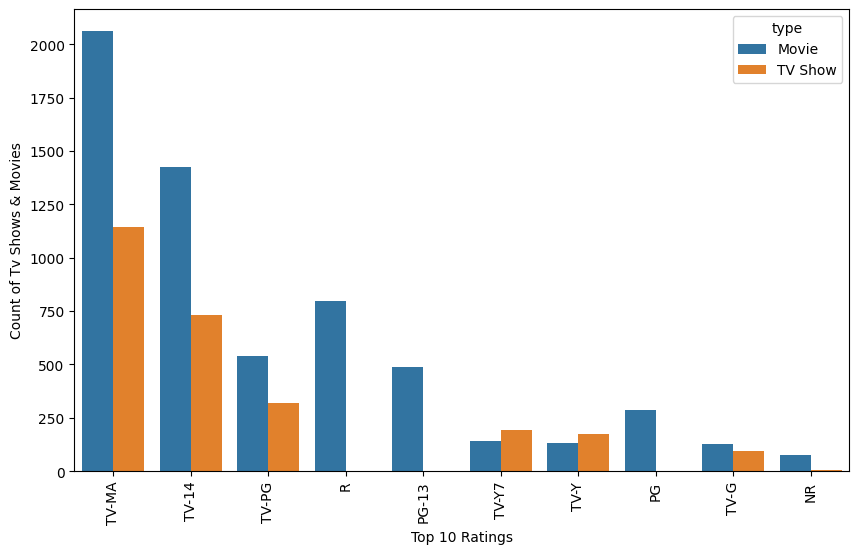

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(data=df[df['rating'].isin(top_10_ratings.index)],x='rating',order=top_10_ratings.index,hue='type')
plt.xticks(rotation=90)
plt.xlabel('Top 10 Ratings')
plt.ylabel('Count of Tv Shows & Movies')
plt.show()

**Insights:**

* Most Netflix shows are for Mature audience like TV-MA, TV-14, and TV-PG.
* These ratings signify strong language, violence, sexuality.
* TV-14 has mild violence and some mature themes, while TV-PG might have moderate violence and suggestive content.

In [49]:
top_10_directors = df[df['director']!='Unknown Director']['director'].value_counts().iloc[:10]

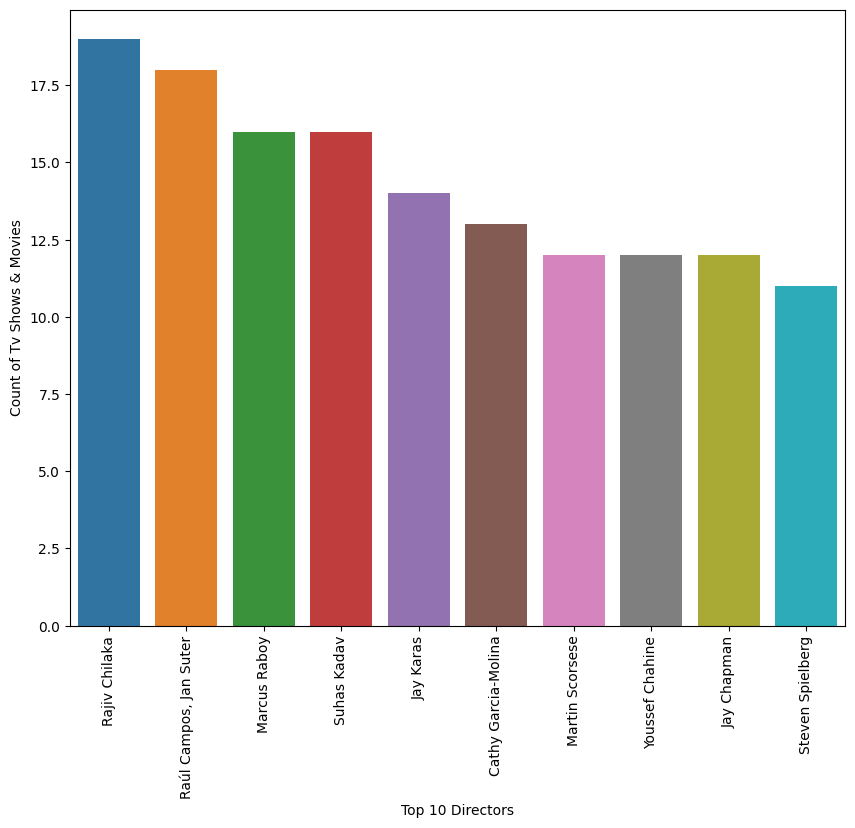

In [50]:
plt.figure(figsize=(10,8))
sns.countplot(data = df[df['director'].isin(top_10_directors.index)], x='director',order=top_10_directors.index)
plt.xlabel('Top 10 Directors')
plt.ylabel('Count of Tv Shows & Movies')
plt.xticks(rotation=90)
plt.show()

In [51]:
top_10_years = df['release_year'].value_counts().iloc[:10]

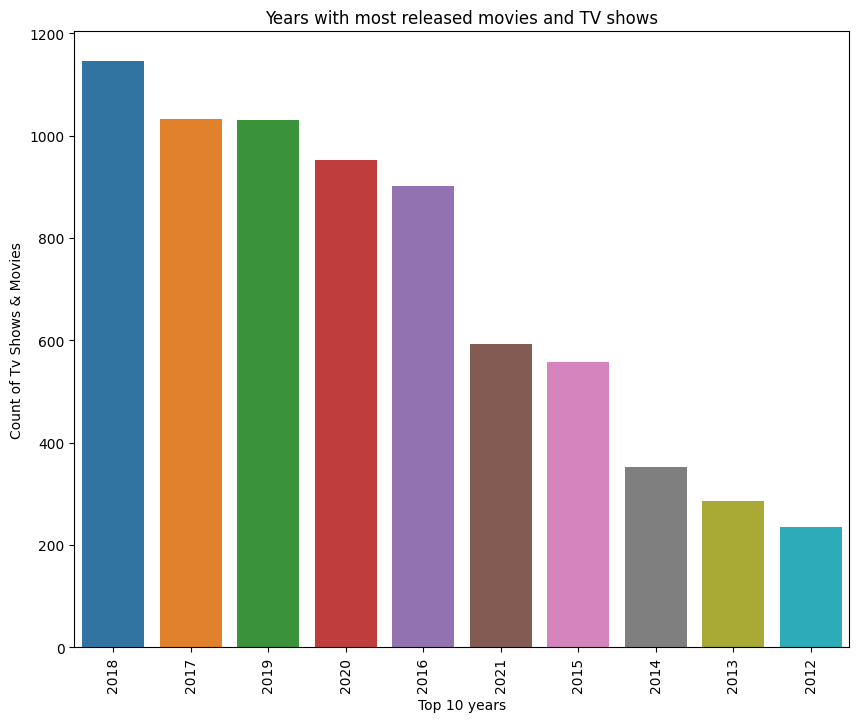

In [52]:
plt.figure(figsize=(10,8))
sns.countplot(data = df[df['release_year'].isin(top_10_years.index)], x='release_year',order=top_10_years.index)
plt.xlabel('Top 10 years')
plt.ylabel('Count of Tv Shows & Movies')
plt.title('Years with most released movies and TV shows')
plt.xticks(rotation=90)
plt.show()

Insights:

* Most of the moves and TV shows are released between 2016 to 2021

#Comparision of tv shows vs movies

In [53]:
top_10_countries_by_movies  = df_cleaned[df_cleaned['type']=='Movie'].groupby('country')['title'].count().sort_values(ascending=False).iloc[:10]
top_10_countries_by_movies

country
United States     2058
India              893
United Kingdom     206
Canada             122
Spain               97
Egypt               92
Nigeria             86
Indonesia           77
Turkey              76
Japan               76
Name: title, dtype: int64

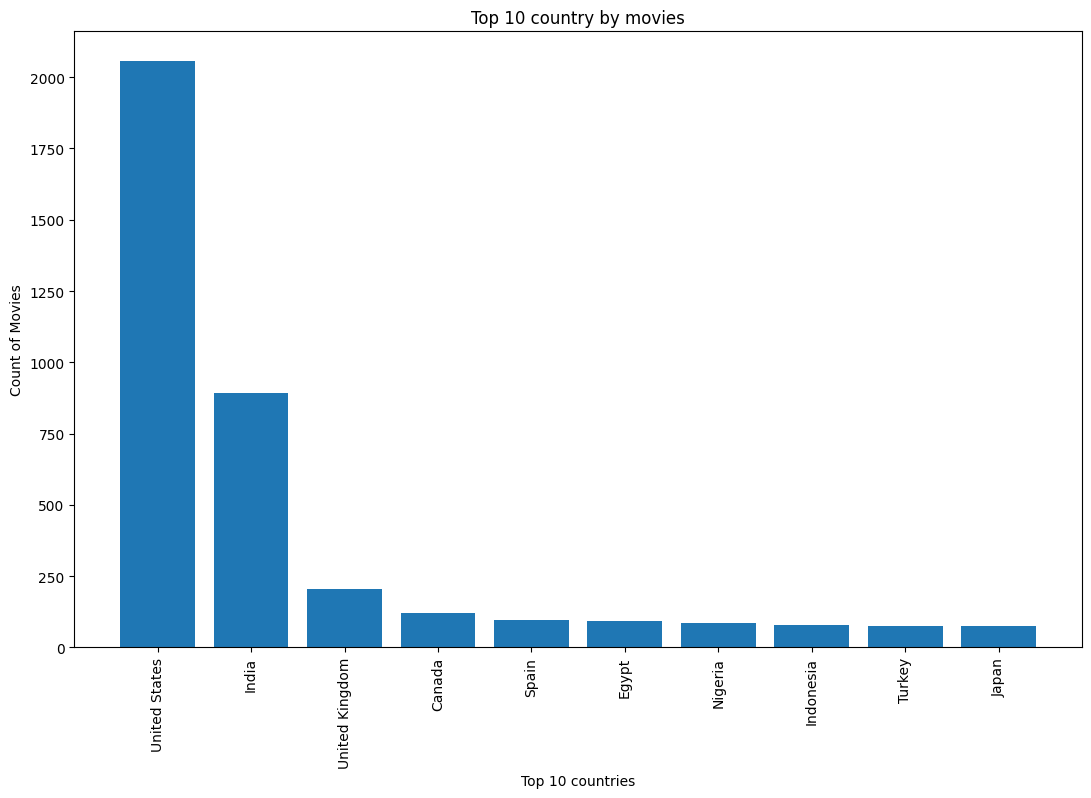

In [54]:
plt.figure(figsize=(13,8))
plt.bar(x=top_10_countries_by_movies.index, height=top_10_countries_by_movies.values)
plt.xlabel('Top 10 countries')
plt.ylabel('Count of Movies')
plt.title('Top 10 country by movies')
plt.xticks(rotation=90)
plt.show()

Insight:

* The US, India and UK are the top 3 countries in Netflix movie production.

In [55]:
top_10_countries_by_Tvshows  = df_cleaned[df_cleaned['type']=='TV Show'].groupby('country')['title'].count().sort_values(ascending=False).iloc[:10]
top_10_countries_by_Tvshows

country
United States     754
United Kingdom    212
Japan             168
South Korea       158
India              79
Taiwan             68
Canada             59
France             49
Spain              48
Australia          47
Name: title, dtype: int64

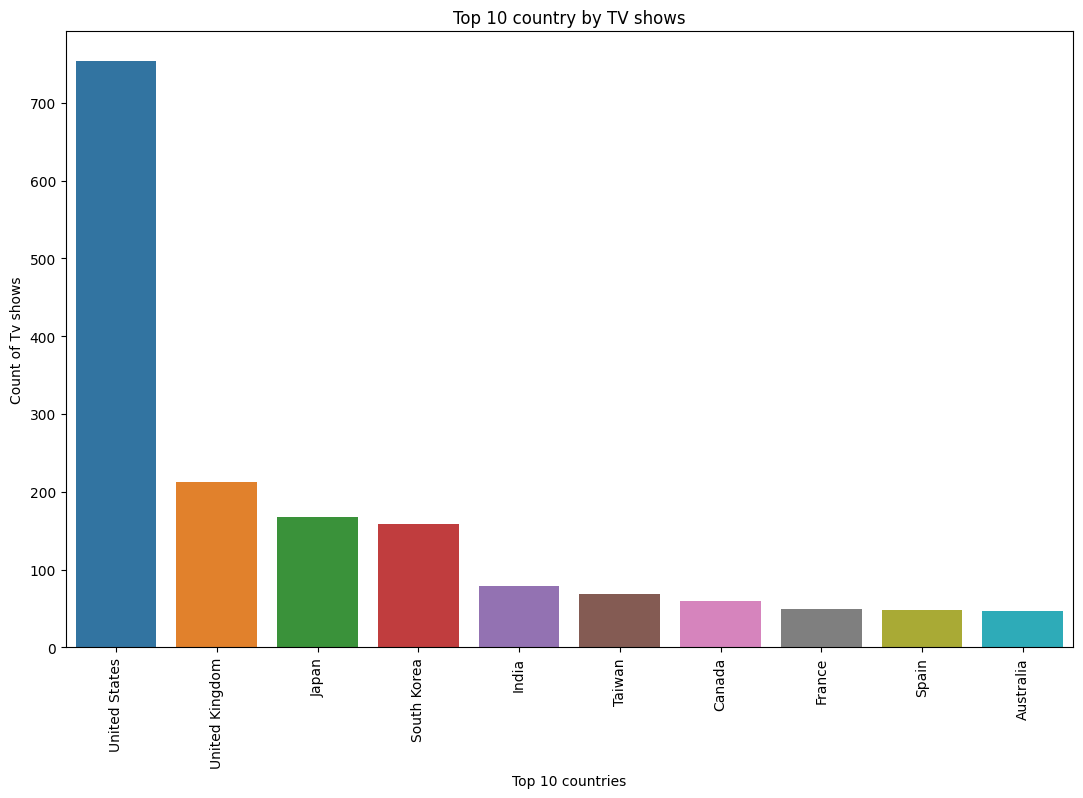

In [56]:
plt.figure(figsize=(13,8))
sns.barplot(data=df_cleaned , x= top_10_countries_by_Tvshows.index, y=top_10_countries_by_Tvshows.values )
plt.xlabel('Top 10 countries')
plt.ylabel('Count of Tv shows')
plt.title('Top 10 country by TV shows')
plt.xticks(rotation=90)
plt.show()

Insight:

* US, UK and Japan are the top 3 producers of TV shows on Netflix.
* India produces relatively less no. of TV shows as compared to Movies.

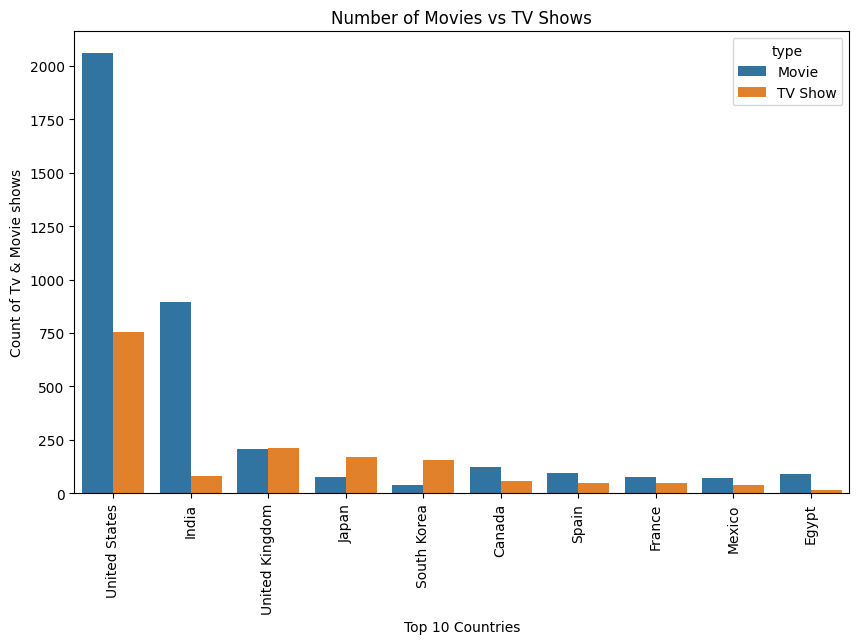

In [57]:
plt.figure(figsize=(10,6))
sns.countplot(data=df[df['country'].isin(top_10_countries.index)],x='country',order=top_10_countries.index,hue='type')
plt.xticks(rotation=90)
plt.xlabel('Top 10 Countries')
plt.ylabel('Count of Tv & Movie shows')
plt.title('Number of Movies vs TV Shows')
plt.show()

#What is the best time to launch a TV show?


In [58]:
#Converting the Date col from object type to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

In [59]:
df['week_added'] = df['date_added'].dt.weekofyear

<ipython-input-59-bbb538a96b6c>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week_added'] = df['date_added'].dt.weekofyear


In [60]:
top_5_weeks_tv_show = df[df['type']=='TV Show'].groupby('week_added')['title'].count().sort_values(ascending=False).iloc[:5]
print(top_5_weeks_tv_show)

week_added
27    86
31    83
13    76
44    75
24    75
Name: title, dtype: int64


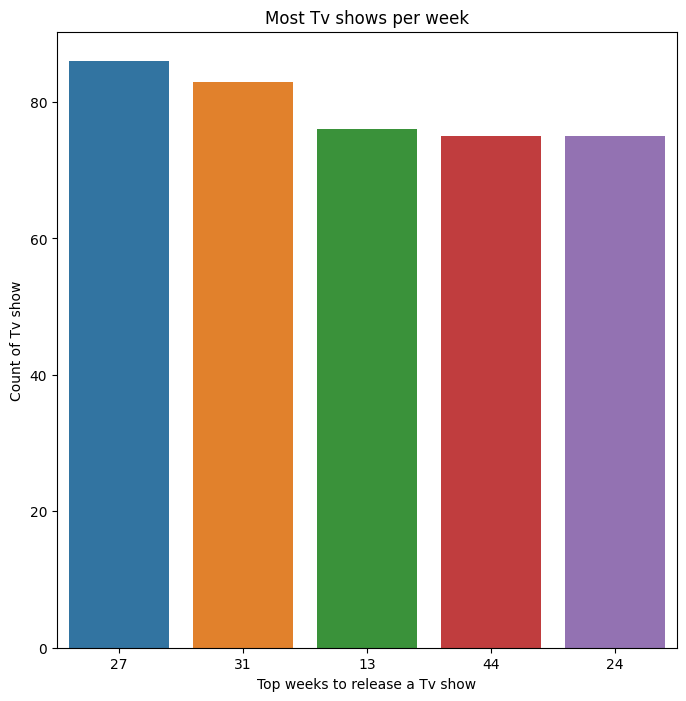

In [61]:
plt.figure(figsize=(8,8))
sns.barplot(x=top_5_weeks_tv_show.index,y=top_5_weeks_tv_show.values,order=top_5_weeks_tv_show.index)
plt.xlabel('Top weeks to release a Tv show')
plt.ylabel('Count of Tv show')
plt.title('Most Tv shows per week')
plt.show()

**Insight**
* TV shows are notably added in weeks around late March/early April, mid-June, and both early and late July. Additionally, there's a significant addition of TV shows in late October/early November.

* This pattern suggests that TV show releases have notable peaks in early summer, late summer, early fall, and late fall.

In [62]:
top_5_weeks_movies = df[df['type']=='Movie'].groupby('week_added')['title'].count().sort_values(ascending=False).iloc[:5]
print(top_5_weeks_movies)

week_added
1     316
44    243
40    215
9     207
26    195
Name: title, dtype: int64


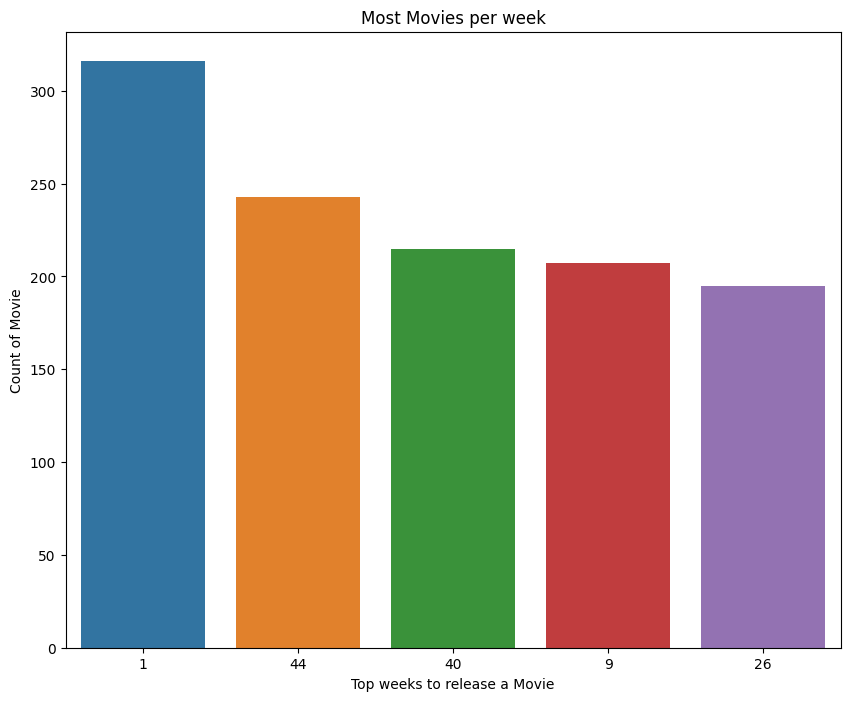

In [63]:
plt.figure(figsize=(10,8))
sns.barplot(x=top_5_weeks_movies.index,y=top_5_weeks_movies.values,order=top_5_weeks_movies.index)
plt.xlabel('Top weeks to release a Movie')
plt.ylabel('Count of Movie')
plt.title('Most Movies per week')
plt.show()

**Insight**
* Movies are prominently released in weeks falling in July, early October, late February to early March, late June to early July, and late August to early September.

* This pattern suggests that movie production peaks around the beginning of summer, early fall, and late winter/early spring periods.

In [64]:
df['month_added'] = df['date_added'].dt.month_name()

In [65]:
top_5_months_tv_show = df[df['type']=='TV Show'].groupby('month_added')['title'].count().sort_values(ascending=False).iloc[:5]
print(top_5_months_tv_show)

month_added
December     266
July         262
September    251
August       236
June         236
Name: title, dtype: int64


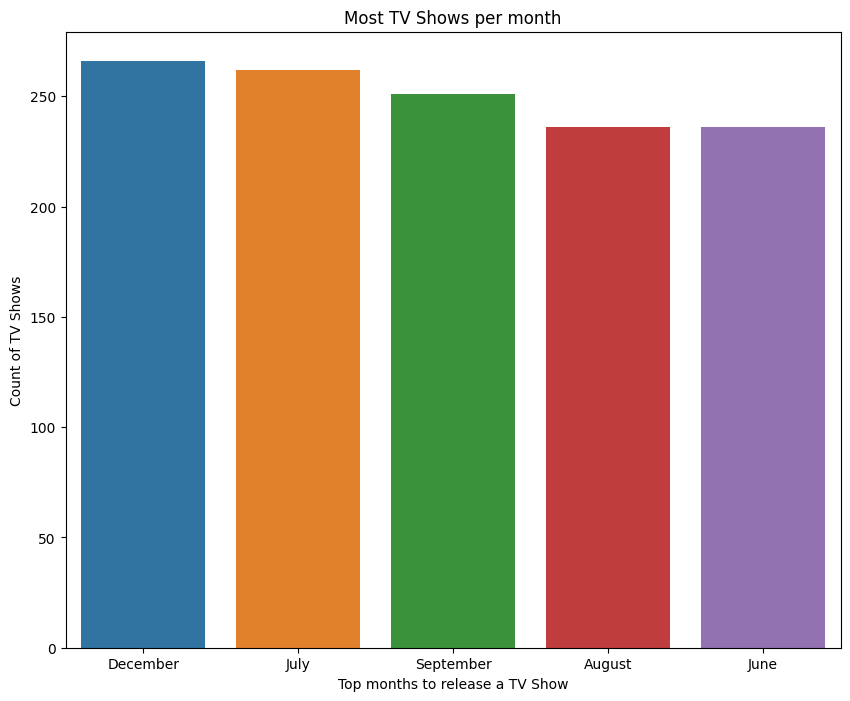

In [66]:
plt.figure(figsize=(10,8))
sns.barplot(x=top_5_months_tv_show.index,y=top_5_months_tv_show.values)
plt.xlabel('Top months to release a TV Show')
plt.ylabel('Count of TV Shows')
plt.title('Most TV Shows per month')
plt.show()

In [67]:
top_5_months_Movies = df[df['type']=='Movie'].groupby('month_added')['title'].count().sort_values(ascending=False).iloc[:5]
print(top_5_months_Movies)

month_added
July        565
April       550
December    547
January     546
October     545
Name: title, dtype: int64


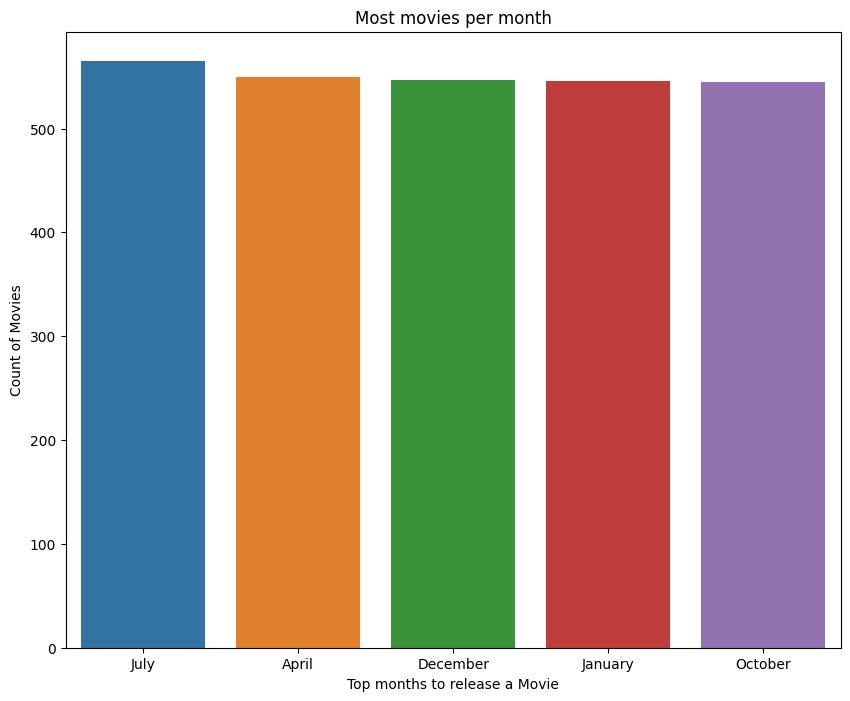

In [68]:
plt.figure(figsize=(10,8))
sns.barplot(x=top_5_months_Movies.index,y=top_5_months_Movies.values,order=top_5_months_Movies.index)
plt.xlabel('Top months to release a Movie')
plt.ylabel('Count of Movies')
plt.title('Most movies per month')
plt.show()

**Insights**

* The months with the most movie additions on Netflix are July and April, indicating that summer tends to be a popular time for releases.

* In summer people have more leisure time, school vacations encourage family outings, the pleasant weather in western countries like US & UK attracts indoor activities, and international holiday periods.

* Additionally, December and January, around Christmas and New Year, also see a significant number of additions, likely due to the festive season, making it a good time for movie releases on Netflix.

* In october also there is lot of festivities in India due to Diwali and Dussehra.

#Analysis of actors/directors of different types of shows/movies.

In [69]:
df_nested['cast'] = df_nested['cast'].str.strip()

Top 10 actors who have appeared in most movies

In [70]:
top_10_actors_for_movies = df_nested[(df_nested['type']=='Movie') & (df_nested['cast']!='Unknown Cast')].groupby('cast')['title'].count().sort_values(ascending=False).iloc[:10]
print(top_10_actors_for_movies)

cast
Anupam Kher         117
Shah Rukh Khan       99
Naseeruddin Shah     92
Akshay Kumar         85
Paresh Rawal         79
Om Puri              78
Amitabh Bachchan     76
Boman Irani          72
Kareena Kapoor       67
Salman Khan          59
Name: title, dtype: int64


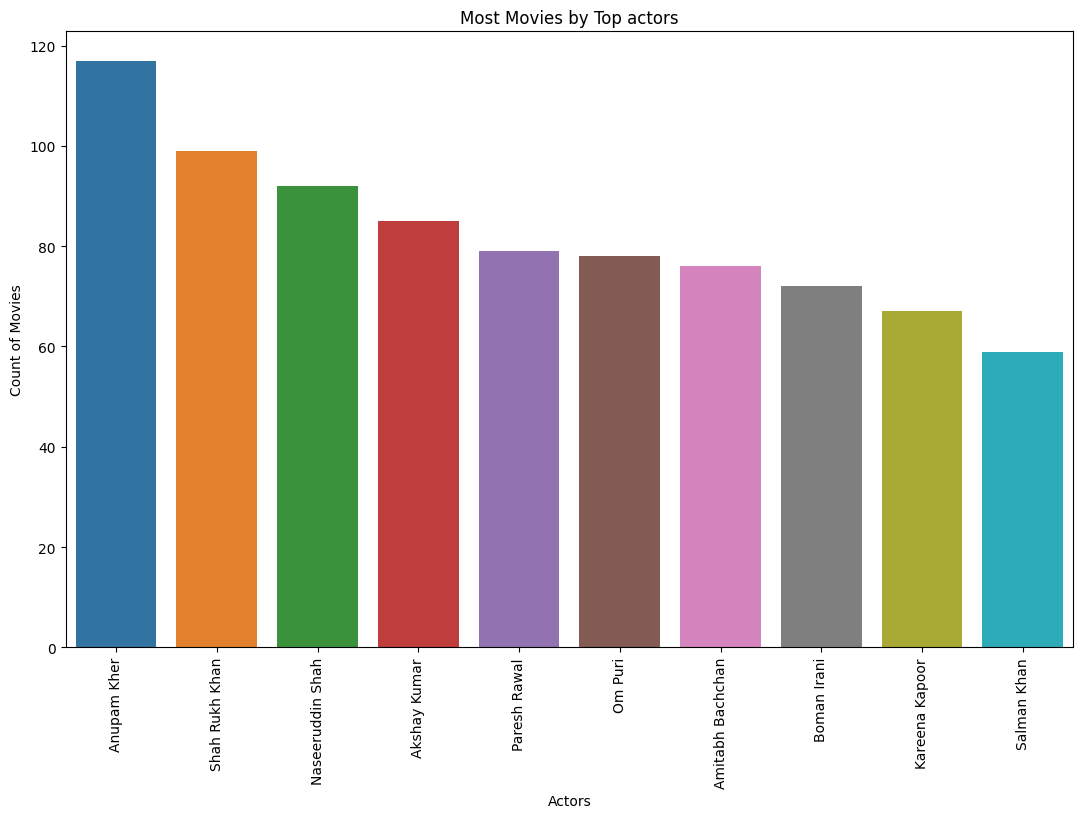

In [71]:
plt.figure(figsize=(13,8))
sns.barplot(x=top_10_actors_for_movies.index,y=top_10_actors_for_movies.values,order=top_10_actors_for_movies.index)
plt.xlabel('Actors')
plt.ylabel('Count of Movies')
plt.title('Most Movies by Top actors')
plt.xticks(rotation=90)
plt.show()

**Insights:**
* Anupam, SRK, Akshay Kumar, and Naseeruddin are among the top four actors who have appeared in the highest number of movies on Netflix.

In [72]:
top_10_actors_for_tv_shows = df_nested[(df_nested['type']=='TV Show') & (df_nested['cast']!='Unknown Cast')].groupby('cast')['title'].count().sort_values(ascending=False).iloc[:10]
print(top_10_actors_for_tv_shows)

cast
Takahiro Sakurai      55
Yuki Kaji             44
David Attenborough    41
Ai Kayano             39
Junichi Suwabe        38
Yuichi Nakamura       38
Daisuke Ono           37
Jun Fukuyama          36
Yoshimasa Hosoya      33
Hiroshi Kamiya        31
Name: title, dtype: int64


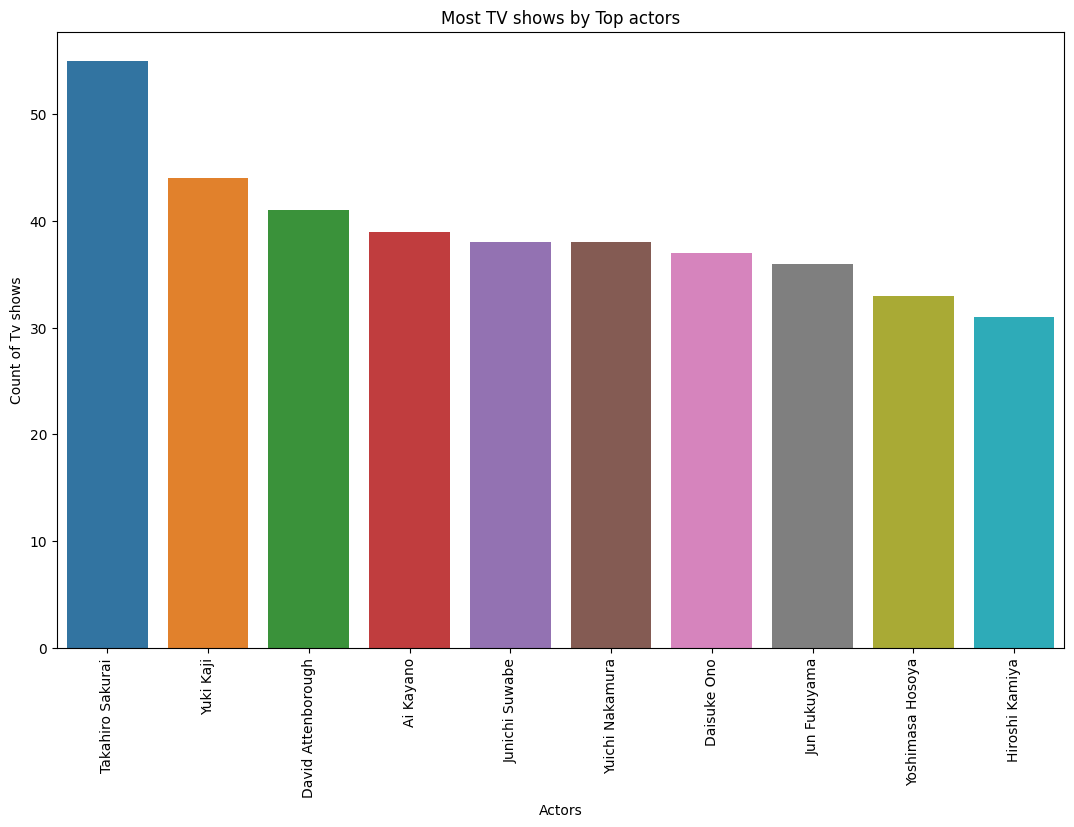

In [73]:
plt.figure(figsize=(13,8))
sns.barplot(x=top_10_actors_for_tv_shows.index,y=top_10_actors_for_tv_shows.values,order=top_10_actors_for_tv_shows.index)
plt.xlabel('Actors')
plt.ylabel('Count of Tv shows')
plt.title('Most TV shows by Top actors')
plt.xticks(rotation=90)
plt.show()

**Insights:**
* Japanese actors such as Takahiro Sakurai, Yuki Kaji, and others listed have contributed significantly to movies or shows on Netflix, indicating a notable presence of Japanese talent in the platform's content.

In [74]:
top_10_director_for_Tv_shows = df[(df['type']=='TV Show') & (df['director']!='Unknown Director')].groupby('director')['title'].count().sort_values(ascending=False).iloc[:10]
print(top_10_director_for_Tv_shows)

director
Alastair Fothergill                                                      3
Stan Lathan                                                              2
Iginio Straffi                                                           2
Rob Seidenglanz                                                          2
Ken Burns                                                                2
Shin Won-ho                                                              2
Hsu Fu-chun                                                              2
Miguel Conde                                                             1
Mike Flanagan                                                            1
Norm Hiscock, Gary Howsam, Mike Smith, John Paul Tremblay, Robb Wells    1
Name: title, dtype: int64


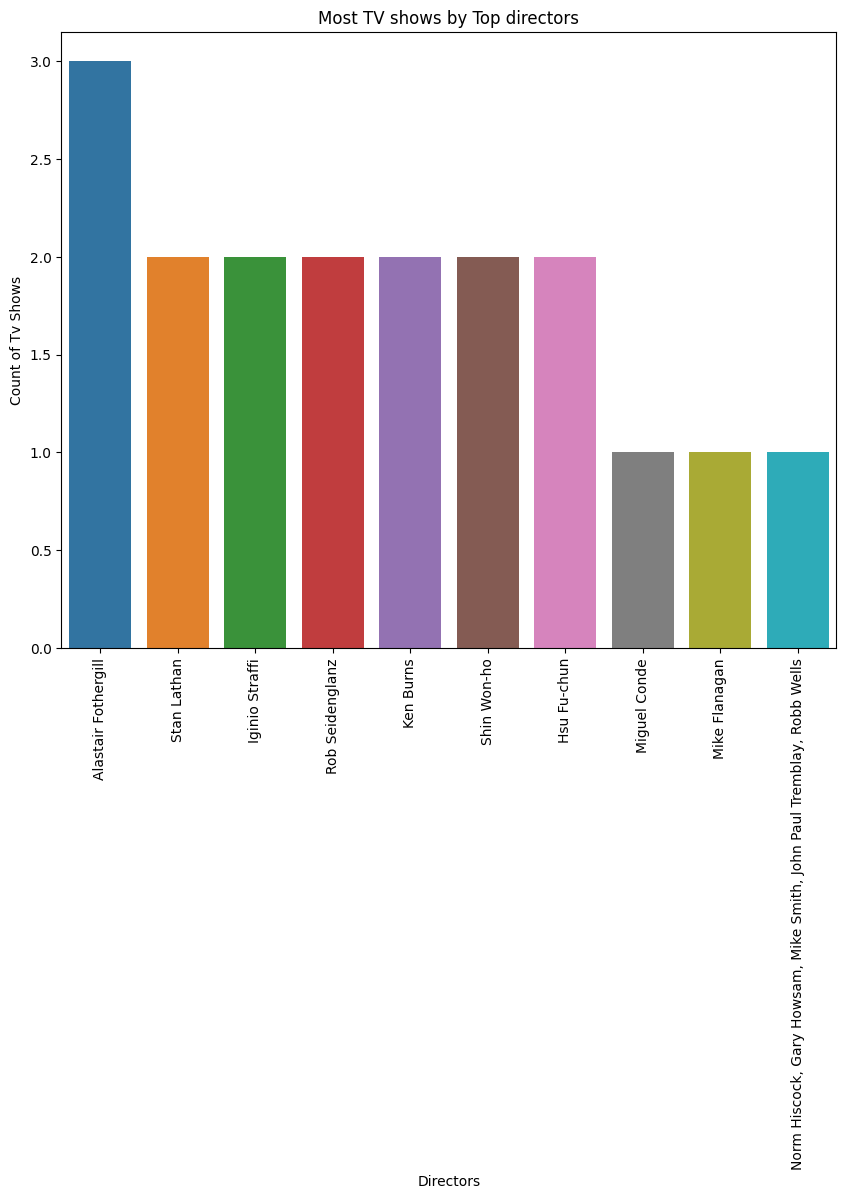

In [75]:
plt.figure(figsize=(10,8))
sns.barplot(x=top_10_director_for_Tv_shows.index,y=top_10_director_for_Tv_shows.values,order=top_10_director_for_Tv_shows.index)
plt.xlabel('Directors')
plt.ylabel('Count of Tv Shows')
plt.title('Most TV shows by Top directors')
plt.xticks(rotation=90)
plt.show()

In [76]:
top_10_director_for_movies = df[(df['type']=='Movie') & (df['director']!='Unknown Director')].groupby('director')['title'].count().sort_values(ascending=False).iloc[:10]
print(top_10_director_for_movies)

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Jay Chapman               12
Youssef Chahine           12
Steven Spielberg          11
Name: title, dtype: int64


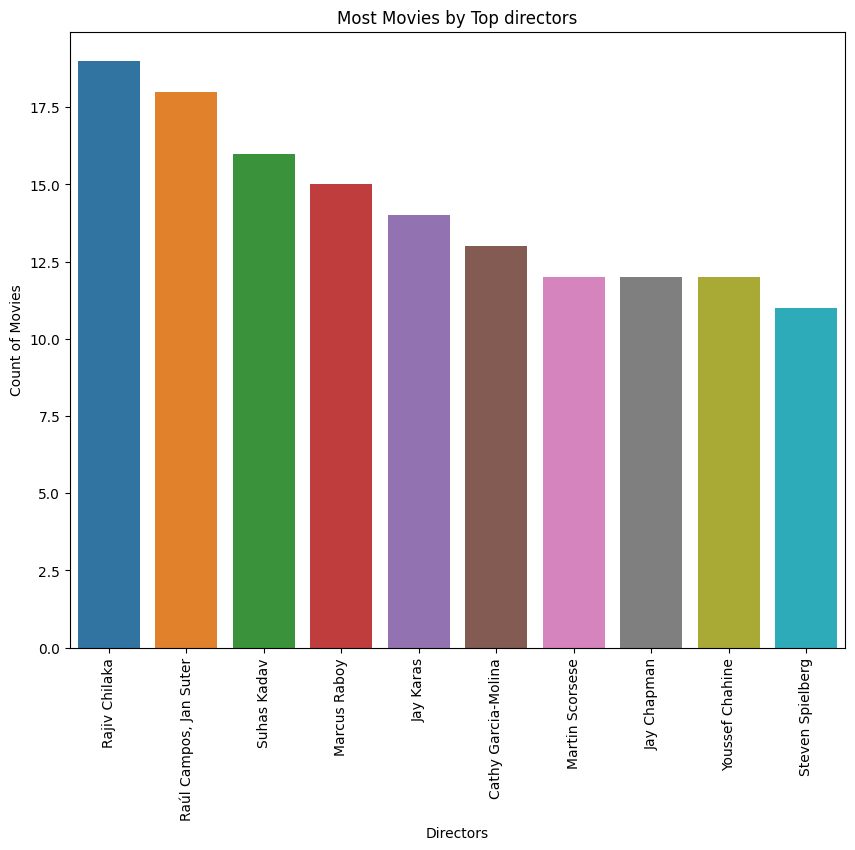

In [77]:
plt.figure(figsize=(10,8))
sns.barplot(x=top_10_director_for_movies.index,y=top_10_director_for_movies.values,order=top_10_director_for_movies.index)
plt.xlabel('Directors')
plt.ylabel('Count of Movies')
plt.title('Most Movies by Top directors')
plt.xticks(rotation=90)
plt.show()

#Which genre movies are most popular and produced more ?

In [78]:
df_genre = pd.read_csv('netflix.csv')

In [79]:
df_genre['listed_in'] = df_genre['listed_in'].str.split(',')

In [80]:
df_genre = df_genre.explode('listed_in')

In [81]:
df_genre['listed_in'] = df_genre['listed_in'].str.strip()

In [82]:
top_10_genre_for_movies = df_genre[df_genre['type'] == 'Movie']['listed_in'].str.strip().value_counts().iloc[:10]
print(top_10_genre_for_movies)

International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Name: listed_in, dtype: int64


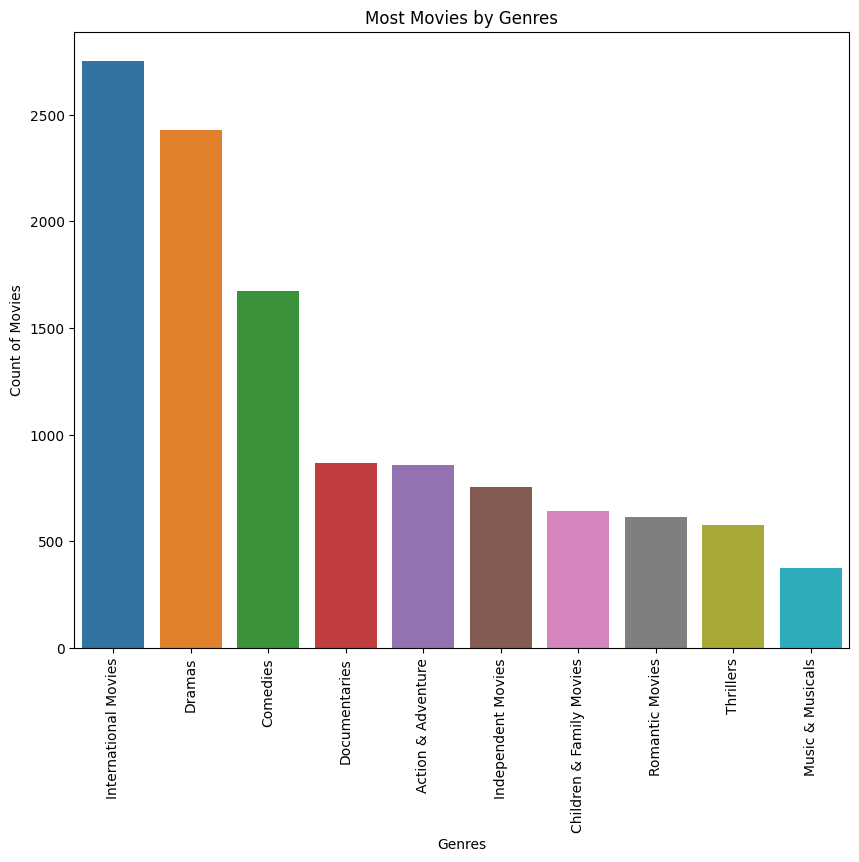

In [83]:
plt.figure(figsize=(10,8))
sns.barplot(x=top_10_genre_for_movies.index,y=top_10_genre_for_movies.values,order=top_10_genre_for_movies.index)
plt.xlabel('Genres')
plt.ylabel('Count of Movies')
plt.title('Most Movies by Genres')
plt.xticks(rotation=90)
plt.show()

* Dramas ,comedies,Documentaries, Action & Adventures are the top Genres on which movies are produced.

* Also a good number of movies are produced on Romance and Thriller Genre.

Word Cloud for most occuring Genres in Movies

In [84]:
df_movie_genres=df_genre[df_genre['type']=='Movie']
# Concatenate all genres into a single string
all_genres = ' '.join(df_movie_genres['listed_in'].apply(lambda x: x.replace(',', ' ')))

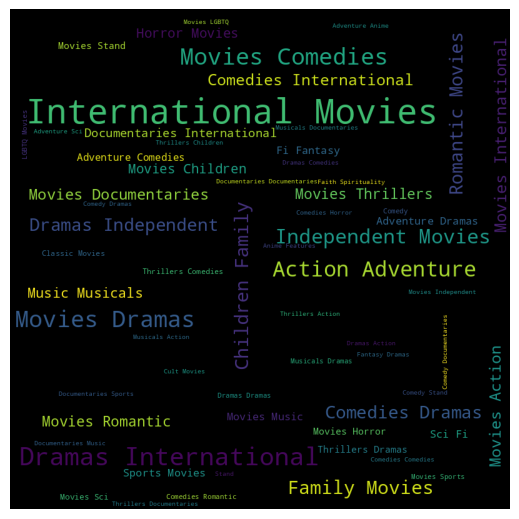

In [85]:
from wordcloud import WordCloud
# Generate word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='Black',
                min_font_size = 10).generate(all_genres)

# Display the word cloud using matplotlib
plt.figure(figsize = (10, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Text preprocessing for Generating Word cloud for TV Shows

In [86]:
df_tv_show_genres=df_genre[df_genre['type']=='TV Show']
# Concatenate all genres into a single string
all_genres_tv_show = ' '.join(df_tv_show_genres['listed_in'].apply(lambda x: x.replace(',', ' ')))

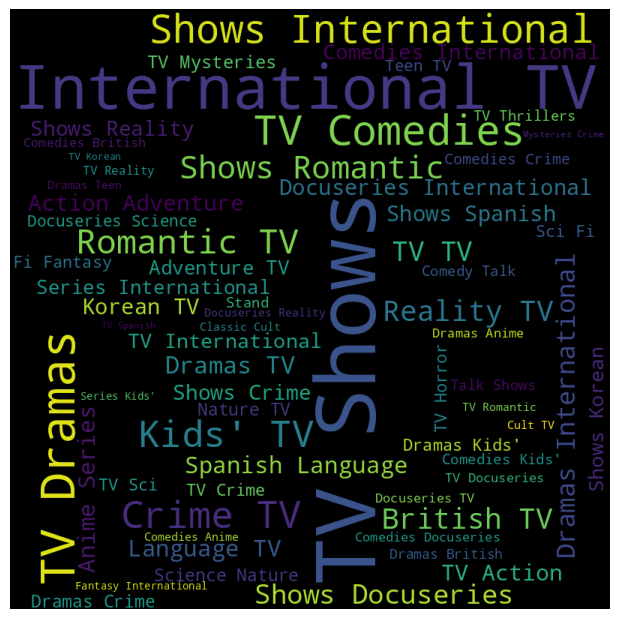

In [87]:
# Generate word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                min_font_size = 10).generate(all_genres_tv_show)

# Display the word cloud using matplotlib
plt.figure(figsize = (10, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [88]:
top_10_tv_show_genres=df_genre[df_genre['type']=='TV Show']['listed_in'].value_counts().iloc[:10]

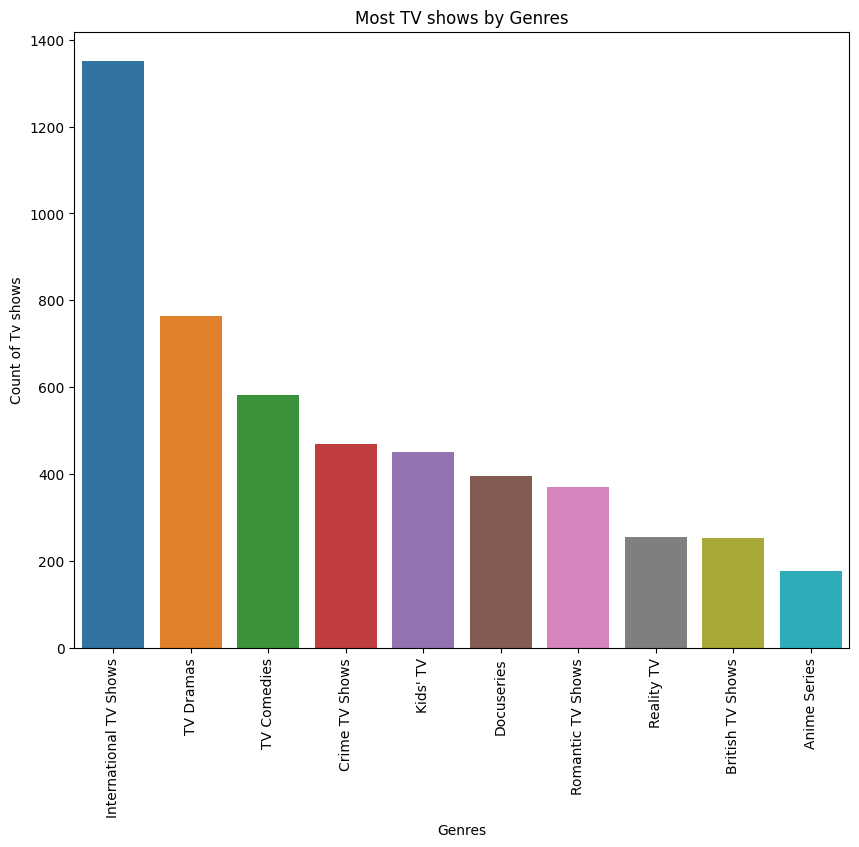

In [89]:
plt.figure(figsize=(10,8))
sns.barplot(x=top_10_tv_show_genres.index,y=top_10_tv_show_genres.values,order=top_10_tv_show_genres.index)
plt.xlabel('Genres')
plt.ylabel('Count of Tv shows')
plt.title('Most TV shows by Genres')
plt.xticks(rotation=90)
plt.show()

**Insights**

* Most Tv shows are produced in the Dramas, Comedies, Crime and Kids genre.

#Find after how many days the movie will be added to netflix after the release of the movie

In [90]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,week_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",38,September
1,s2,TV Show,Blood & Water,Unknown Director,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",38,September
2,s3,TV Show,Ganglands,Julien Leclercq,Unknown Country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,38,September
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",38,September
4,s5,TV Show,Kota Factory,Unknown Director,India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,38,September


In [91]:
df['release_year'] = pd.to_datetime(df.release_year, format='%Y')

In [92]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,week_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",38,September
1,s2,TV Show,Blood & Water,Unknown Director,South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",38,September
2,s3,TV Show,Ganglands,Julien Leclercq,Unknown Country,2021-09-24,2021-01-01,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,38,September
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Country,2021-09-24,2021-01-01,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",38,September
4,s5,TV Show,Kota Factory,Unknown Director,India,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,38,September


In [93]:
df['release_day_difference'] = df['date_added'] - df['release_year']

In [94]:
df['release_day_difference'].mode()

0   334 days
Name: release_day_difference, dtype: timedelta64[ns]

**Insights:**
* After release it will take approximately **334 days** to be added in Netflix for most of the Movies/Tv shows.

**Brief Recommendations:**

* Most content on Netflix is rated for adults (TV-MA), indicating a liking for mature, violent, and sexual content. To grow its audience, Netflix could focus more on different genres.

* Best Times to Release: Holidays, especially from November to January, and during the summer in June are great times to launch new content on Netflix.

* Popular Genres: Drama, comedy, crime, action, and adventure are the most liked genres. Netflix should create more movies and shows in these categories.

* Japanese Actors and TV Shows: Japanese actors are well-liked in Netflix TV shows, particularly in the US, UK, Japan, and South Korea.

* Indian Actors and Movies:Indian actors have starred in the most Netflix movies, showing that Netflix movies are quite popular in India.

**Simplified Summary:**
* Adult-rated content is popular; releasing during holidays and summer works best. Dramas, comedies, crimes, actions, and adventures are loved genres. Indian actors dominate movies, and Japanese actors shine in TV shows on Netflix.